In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv('src/X_train.csv')
test = pd.read_csv('src/X_test.csv')

In [3]:
#ID variable
train_ID = train['Id']
test_ID = test['Id']

In [4]:
#drop the  'Id' colum 
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [5]:
y_train=train["SalePrice"]
#drop the  target colum 
train.drop("SalePrice", axis = 1, inplace = True)

In [6]:
gbm = GradientBoostingRegressor(random_state=36)
rf = RandomForestRegressor(random_state = 36)

## Setup of the Random Forest Randomized Hyperparameter Search

In [7]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [12]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               scoring="neg_mean_squared_error", cv = 4, verbose=2, random_state=36, n_jobs = 3)

In [13]:
# Fit the random search model
rf_random.fit(train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 14.7min
[Parallel(n_jobs=3)]: Done 400 out of 400 | elapsed: 16.4min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=36,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=36, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [14]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1400, n_jobs=1, oob_score=False, random_state=36,
           verbose=0, warm_start=False)

In [15]:
rf_random.best_score_

-0.019476877270038967

In [16]:
y_test=rf_random.predict(test)

Reverting ln(x+1) transformation on target

In [17]:
y_test = np.expm1(y_test)

In [18]:
df = pd.DataFrame({'Id':test_ID, 'SalePrice':y_test})

In [7]:
# Number of trees in Gradient Boosting
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]
# Create the random grid
gbm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [8]:
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = gbm_grid, n_iter = 100, 
                               scoring="neg_mean_squared_error", cv = 4, verbose=2, random_state=36, n_jobs = 3)

In [9]:
# Fit the random search model
gbm_random.fit(train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   59.7s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  7.8min
[Parallel(n_jobs=3)]: Done 400 out of 400 | elapsed:  8.6min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=36, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=36, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [10]:
gbm_random.best_score_

-0.016687636337612891

In [11]:
y_test_gbm=gbm_random.predict(test)

In [13]:
y_train_predict=gbm_random.predict(train)

In [46]:
y_train_predict= np.expm1(y_train_predict)
y_train= np.expm1(y_train)

In [14]:
import matplotlib.pyplot as plt

In [49]:
y_train[:15]-y_train_predict[0:15]

0    28.764676
1   -13.992839
2     8.164119
3   -26.547757
4    -9.679953
5    13.646368
6   -19.880717
7    16.596304
8   -55.745141
9     2.844179
Name: SalePrice, dtype: float64

In [57]:
from sklearn.metrics import r2_score

In [65]:
gbm_random.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1400, presort='auto', random_state=36,
             subsample=1.0, verbose=0, warm_start=False)

In [66]:
gbm2=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1400, presort='auto', random_state=36,
             subsample=1.0, verbose=0, warm_start=False)

In [67]:
y_train = np.log1p(y_train)

In [69]:
gbm2.fit(train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1400, presort='auto', random_state=36,
             subsample=1.0, verbose=0, warm_start=False)

In [70]:
y_train_predict=gbm2.predict(train)

In [71]:
y_train_predict= np.expm1(y_train_predict)
y_train= np.expm1(y_train)

In [72]:
r2_score(y_train,y_train_predict)

0.99999964021069632

In [78]:
np.argsort(importances)[::-1]

array([14, 43, 66, 34, 28, 45, 54, 50, 69, 68,  7, 58,  6, 56, 67,  0, 18,
       55, 48, 22, 49, 21, 63, 70, 51,  4, 19, 24, 25,  3, 31,  9, 64, 33,
       20, 40, 13, 57, 23,  8, 27, 29, 10, 37, 11, 62, 38, 35, 16, 36, 30,
       26, 46, 15, 41,  5, 44, 65, 17, 32, 53, 42, 59,  2, 60, 61, 52, 47,
       12,  1, 39], dtype=int64)

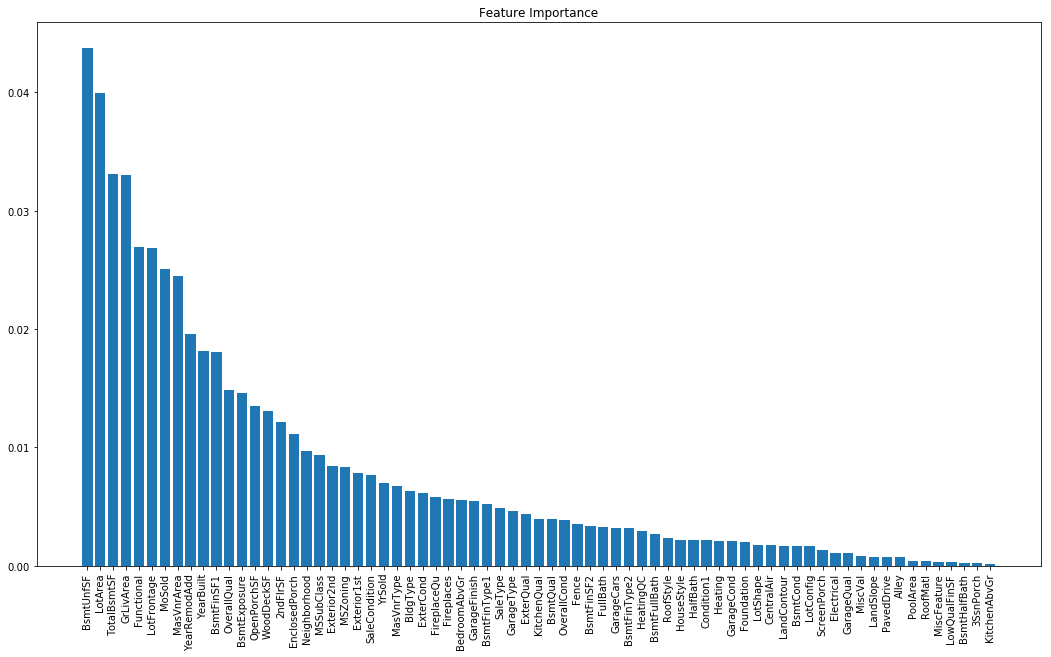

In [81]:
# Plot the feature importances of the forest
importances = gbm2.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

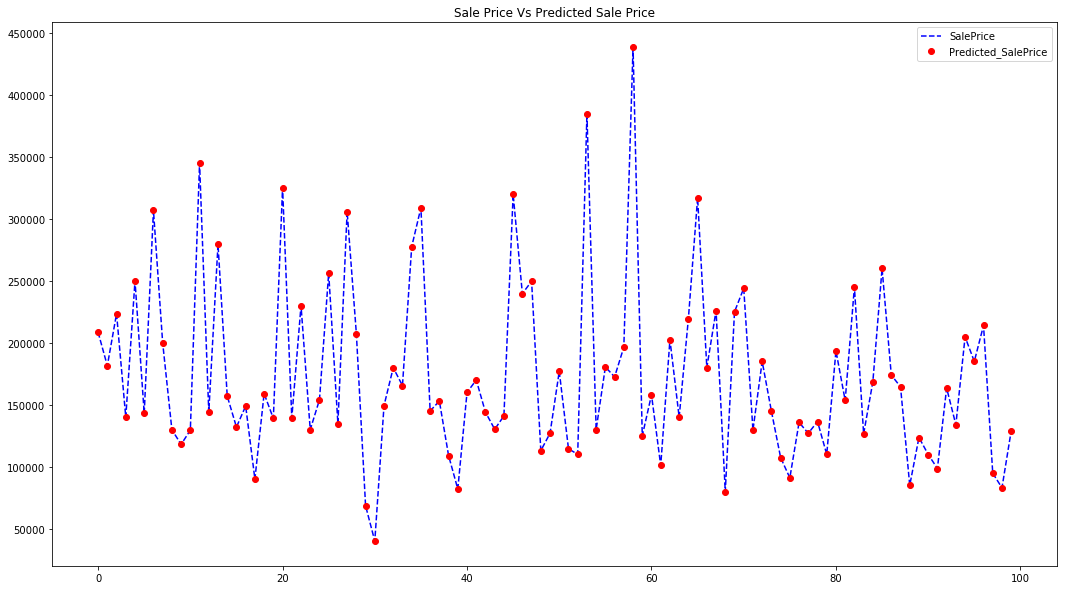

In [84]:
plt.plot(y_train[:100], 'b--',y_train_predict[0:100],'ro')
plt.legend(["SalePrice","Predicted_SalePrice"])
plt.title("Sale Price Vs Predicted Sale Price")
plt.show()

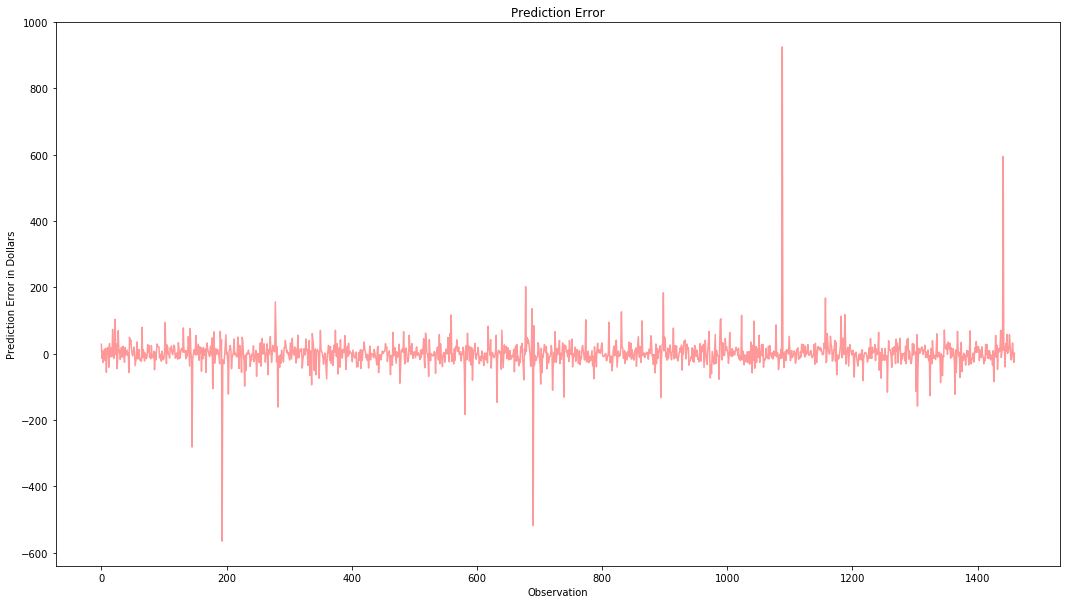

In [86]:
plt.plot(y_train-y_train_predict, color="red", alpha=0.4)
plt.title('Prediction Error')
plt.ylabel('Prediction Error in Dollars')
plt.xlabel('Observation')
plt.show()

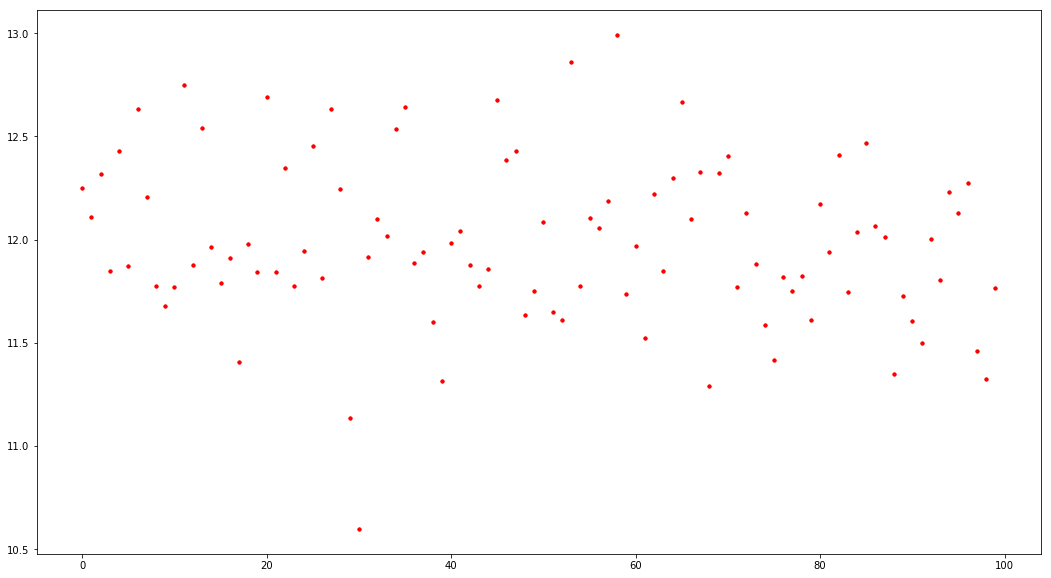

In [34]:
plt.plot(y_train_predict[:100],'r.')
plt.show()

In [30]:
y_test_gbm = np.expm1(y_test_gbm)

In [31]:
df = pd.DataFrame({'Id':test_ID, 'SalePrice':y_test_gbm})

In [32]:
df.to_csv("output/gbm_submission.csv", index=False)

In [33]:
gbm_random.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=60,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1400, presort='auto', random_state=36,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1300, stop = 3000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20,30,40,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 7, 10,20,30]
# Create the random grid
gbm_grid_2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [35]:
gbm_random2 = RandomizedSearchCV(estimator = gbm, param_distributions = gbm_grid, n_iter = 200, 
                               scoring="neg_mean_squared_error", cv = 4, verbose=2, random_state=36, n_jobs = 3)

In [36]:
# Fit the random search model
gbm_random2.fit(train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   56.9s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  7.6min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 13.2min
[Parallel(n_jobs=3)]: Done 800 out of 800 | elapsed: 16.4min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=36, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=3,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=36, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [37]:
gbm_random2.best_score_

-0.016559626234827065

In [38]:
gbm_random2.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=20,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=1800, presort='auto', random_state=36,
             subsample=1.0, verbose=0, warm_start=False)

In [39]:
y_test_gbm2=gbm_random2.predict(test)

In [40]:
y_test_gbm2 = np.expm1(y_test_gbm2)

In [41]:
df = pd.DataFrame({'Id':test_ID, 'SalePrice':y_test_gbm2})

In [42]:
df.to_csv("output/gbm2_submission.csv", index=False)